In [186]:
import torch
import torch.nn as nn
from torch.optim import SGD

import numpy as np
from numpy import dot
import matplotlib.pyplot as plt

In [187]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_layer = nn.Linear(input_size, hidden_size)
        self.hidden = nn.Linear(hidden_size, hidden_size)
        self.output_layer = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        x=self.input_layer(x)
        x=x.relu()
        x=self.hidden(x)
        x=x.relu()
        x=self.output_layer(x)
        return x
    
def ReLU_glorot_init(model):
    for name, param in model.named_parameters():
        
        if name.endswith(".bias"):
            param.data.fill_(0)
        else:
            nn.init.xavier_normal_(param)

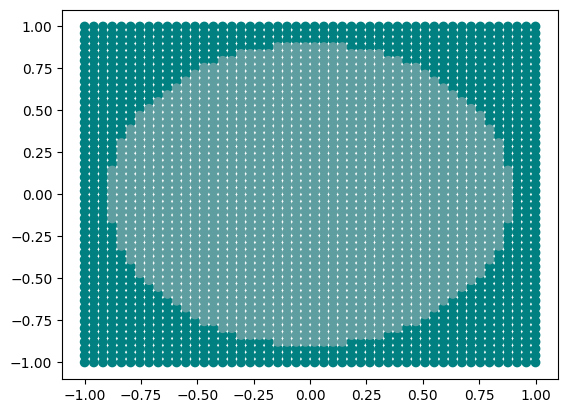

In [188]:
RES=50
X=[]
for x_1 in np.linspace(-1,1,RES):
    for x_2 in np.linspace(-1,1,RES):
        X.append([x_1,x_2])
X=np.array(X)

encode_inputs=lambda x: 1 if x[0]**2+x[1]**2<np.sqrt(2/np.pi) else 0
Y=np.array([encode_inputs(x) for x in X])

X_0=np.array([x for k,x in enumerate(X) if Y[k]==0])
X_1=np.array([x for k,x in enumerate(X) if Y[k]==1])
X=np.concatenate((X_0,X_1))
Y=np.concatenate((np.zeros(len(X_0)),np.ones(len(X_1))))

X=torch.from_numpy(X).float()
Y=torch.from_numpy(Y).float()


colors=np.full(len(Y), 'cadetblue')
colors[Y==0]='teal'

plt.scatter(X[:,0],X[:,1],c=colors)

In [189]:
model = NeuralNet(2,16,2)
ReLU_glorot_init(model)

def next_batch(inputs, targets, batchSize):
	for i in range(0, inputs.shape[0], batchSize):
		yield (inputs[i:i + batchSize], targets[i:i + batchSize])

BATCH_SIZE = 100
EPOCHS = 200
LR = 0.05

opt = SGD(model.parameters(), lr=LR)
lossFunc = nn.CrossEntropyLoss()

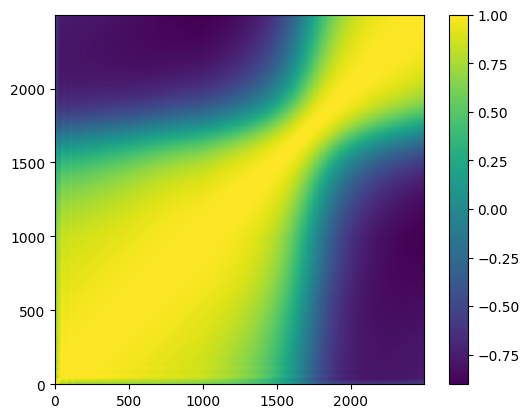

In [190]:
grads=[]
for x,y in next_batch(X,Y,1):
    predictions = model(x)
    loss = lossFunc(predictions, y.long())
    loss.backward()
    gradient=[]
    gradient+=torch.flatten(model.input_layer.weight.grad).tolist()
    gradient+=model.input_layer.bias.grad.tolist()
    gradient+=torch.flatten(model.hidden.weight.grad).tolist()
    gradient+=model.hidden.bias.grad.tolist()
    gradient+=torch.flatten(model.output_layer.weight.grad).tolist()
    gradient+=model.output_layer.bias.grad.tolist()
    gradient=np.array(gradient)
    gradient=gradient/np.linalg.norm(gradient)
    grads.append(gradient)
dot_matrix=[]
for grad1 in grads:
    row=[]
    for grad2 in grads:
        row.append(dot(grad1,grad2))
    dot_matrix.append(np.array(row))
dot_matrix=np.array(dot_matrix)

fig, axs = plt.subplots(1,1)

pcm=axs.imshow(dot_matrix,origin='lower')

fig.colorbar(pcm, ax=axs)

In [191]:
def training():
	opt = SGD(model.parameters(), lr=LR)
	trainLoss = 0
	samples = 0
	model.train()
	for batchX, batchY in next_batch(X, Y, BATCH_SIZE):
		predictions = model(batchX)
		loss = lossFunc(predictions, batchY.long())
		opt.zero_grad()
		loss.backward()
		opt.step()


		samples += len(batchY)
                

		trainLoss += loss.item()*len(batchY)
	return trainLoss/samples

Epoch 1: Loss 0.601
Epoch 2: Loss 0.609
Epoch 3: Loss 0.605
Epoch 4: Loss 0.590
Epoch 5: Loss 0.575


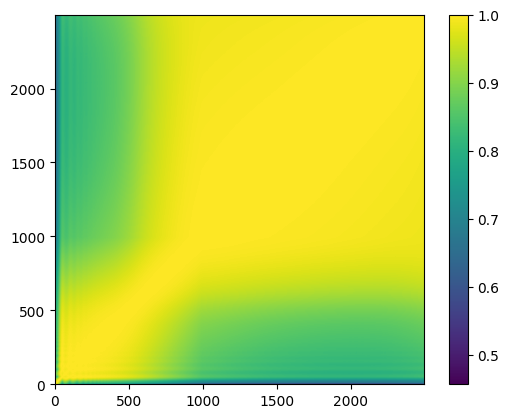

In [192]:
for n in range(5):
    l=training()
    print('Epoch {}: Loss {:.3f}'.format(n+1,l))

grads=[]
for x,y in next_batch(X,Y,1):
    predictions = model(x)
    loss = lossFunc(predictions, y.long())
    loss.backward()
    gradient=[]
    gradient+=torch.flatten(model.input_layer.weight.grad).tolist()
    gradient+=model.input_layer.bias.grad.tolist()
    gradient+=torch.flatten(model.hidden.weight.grad).tolist()
    gradient+=model.hidden.bias.grad.tolist()
    gradient+=torch.flatten(model.output_layer.weight.grad).tolist()
    gradient+=model.output_layer.bias.grad.tolist()
    gradient=np.array(gradient)
    gradient=gradient/np.linalg.norm(gradient)
    grads.append(gradient)
dot_matrix=[]
for grad1 in grads:
    row=[]
    for grad2 in grads:
        row.append(dot(grad1,grad2))
    dot_matrix.append(np.array(row))
dot_matrix=np.array(dot_matrix)

fig, axs = plt.subplots(1,1)

pcm=axs.imshow(dot_matrix,origin='lower')

fig.colorbar(pcm, ax=axs)

Epoch 1: Loss 0.558
Epoch 2: Loss 0.540
Epoch 3: Loss 0.521
Epoch 4: Loss 0.500
Epoch 5: Loss 0.479


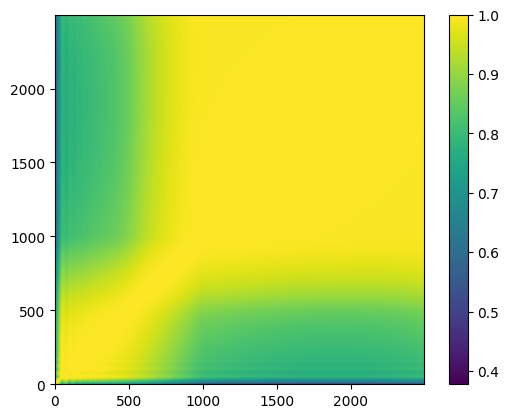

In [193]:
for n in range(5):
    l=training()
    print('Epoch {}: Loss {:.3f}'.format(n+1,l))

grads=[]
for x,y in next_batch(X,Y,1):
    predictions = model(x)
    loss = lossFunc(predictions, y.long())
    loss.backward()
    gradient=[]
    gradient+=torch.flatten(model.input_layer.weight.grad).tolist()
    gradient+=model.input_layer.bias.grad.tolist()
    gradient+=torch.flatten(model.hidden.weight.grad).tolist()
    gradient+=model.hidden.bias.grad.tolist()
    gradient+=torch.flatten(model.output_layer.weight.grad).tolist()
    gradient+=model.output_layer.bias.grad.tolist()
    gradient=np.array(gradient)
    gradient=gradient/np.linalg.norm(gradient)
    grads.append(gradient)
dot_matrix=[]
for grad1 in grads:
    row=[]
    for grad2 in grads:
        row.append(dot(grad1,grad2))
    dot_matrix.append(np.array(row))
dot_matrix=np.array(dot_matrix)

fig, axs = plt.subplots(1,1)

pcm=axs.imshow(dot_matrix,origin='lower')

fig.colorbar(pcm, ax=axs)

Epoch 1: Loss 0.459
Epoch 2: Loss 0.440
Epoch 3: Loss 0.422
Epoch 4: Loss 0.405
Epoch 5: Loss 0.389


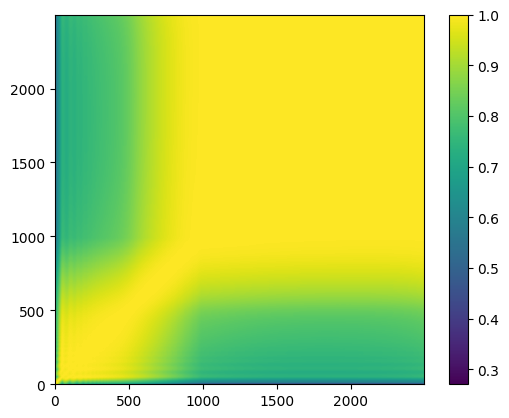

In [194]:
for n in range(5):
    l=training()
    print('Epoch {}: Loss {:.3f}'.format(n+1,l))

grads=[]
for x,y in next_batch(X,Y,1):
    predictions = model(x)
    loss = lossFunc(predictions, y.long())
    loss.backward()
    gradient=[]
    gradient+=torch.flatten(model.input_layer.weight.grad).tolist()
    gradient+=model.input_layer.bias.grad.tolist()
    gradient+=torch.flatten(model.hidden.weight.grad).tolist()
    gradient+=model.hidden.bias.grad.tolist()
    gradient+=torch.flatten(model.output_layer.weight.grad).tolist()
    gradient+=model.output_layer.bias.grad.tolist()
    gradient=np.array(gradient)
    gradient=gradient/np.linalg.norm(gradient)
    grads.append(gradient)
dot_matrix=[]
for grad1 in grads:
    row=[]
    for grad2 in grads:
        row.append(dot(grad1,grad2))
    dot_matrix.append(np.array(row))
dot_matrix=np.array(dot_matrix)

fig, axs = plt.subplots(1,1)

pcm=axs.imshow(dot_matrix,origin='lower')

fig.colorbar(pcm, ax=axs)

Epoch 1: Loss 0.375
Epoch 2: Loss 0.360
Epoch 3: Loss 0.347
Epoch 4: Loss 0.335
Epoch 5: Loss 0.324


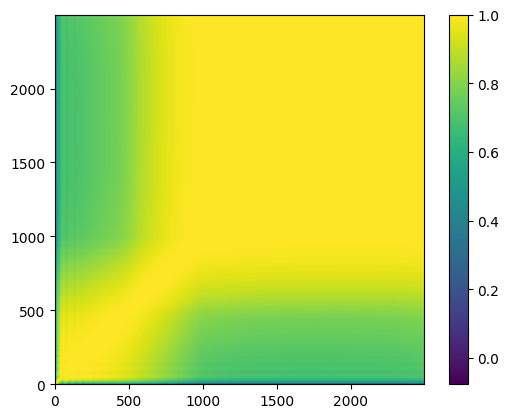

In [195]:
for n in range(5):
    l=training()
    print('Epoch {}: Loss {:.3f}'.format(n+1,l))

grads=[]
for x,y in next_batch(X,Y,1):
    predictions = model(x)
    loss = lossFunc(predictions, y.long())
    loss.backward()
    gradient=[]
    gradient+=torch.flatten(model.input_layer.weight.grad).tolist()
    gradient+=model.input_layer.bias.grad.tolist()
    gradient+=torch.flatten(model.hidden.weight.grad).tolist()
    gradient+=model.hidden.bias.grad.tolist()
    gradient+=torch.flatten(model.output_layer.weight.grad).tolist()
    gradient+=model.output_layer.bias.grad.tolist()
    gradient=np.array(gradient)
    gradient=gradient/np.linalg.norm(gradient)
    grads.append(gradient)
dot_matrix=[]
for grad1 in grads:
    row=[]
    for grad2 in grads:
        row.append(dot(grad1,grad2))
    dot_matrix.append(np.array(row))
dot_matrix=np.array(dot_matrix)

fig, axs = plt.subplots(1,1)

pcm=axs.imshow(dot_matrix,origin='lower')

fig.colorbar(pcm, ax=axs)

Epoch 1: Loss 0.313
Epoch 2: Loss 0.304
Epoch 3: Loss 0.295
Epoch 4: Loss 0.288
Epoch 5: Loss 0.279
Epoch 6: Loss 0.272
Epoch 7: Loss 0.264
Epoch 8: Loss 0.257
Epoch 9: Loss 0.250
Epoch 10: Loss 0.244
Epoch 11: Loss 0.238
Epoch 12: Loss 0.232
Epoch 13: Loss 0.227
Epoch 14: Loss 0.223
Epoch 15: Loss 0.218
Epoch 16: Loss 0.214
Epoch 17: Loss 0.210
Epoch 18: Loss 0.206
Epoch 19: Loss 0.202
Epoch 20: Loss 0.198
Epoch 21: Loss 0.195
Epoch 22: Loss 0.192
Epoch 23: Loss 0.188
Epoch 24: Loss 0.186
Epoch 25: Loss 0.183
Epoch 26: Loss 0.180
Epoch 27: Loss 0.178
Epoch 28: Loss 0.175
Epoch 29: Loss 0.173
Epoch 30: Loss 0.171
Epoch 31: Loss 0.169
Epoch 32: Loss 0.167
Epoch 33: Loss 0.165
Epoch 34: Loss 0.163
Epoch 35: Loss 0.161
Epoch 36: Loss 0.159
Epoch 37: Loss 0.157
Epoch 38: Loss 0.156
Epoch 39: Loss 0.154
Epoch 40: Loss 0.152
Epoch 41: Loss 0.151
Epoch 42: Loss 0.150
Epoch 43: Loss 0.148
Epoch 44: Loss 0.147
Epoch 45: Loss 0.145
Epoch 46: Loss 0.144
Epoch 47: Loss 0.143
Epoch 48: Loss 0.142
E

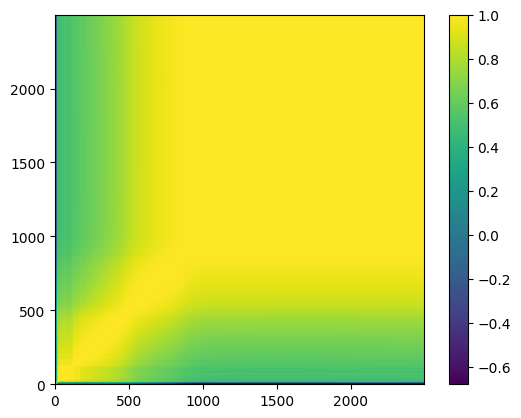

In [196]:
for n in range(100):
    l=training()
    print('Epoch {}: Loss {:.3f}'.format(n+1,l))

grads=[]
for x,y in next_batch(X,Y,1):
    predictions = model(x)
    loss = lossFunc(predictions, y.long())
    loss.backward()
    gradient=[]
    gradient+=torch.flatten(model.input_layer.weight.grad).tolist()
    gradient+=model.input_layer.bias.grad.tolist()
    gradient+=torch.flatten(model.hidden.weight.grad).tolist()
    gradient+=model.hidden.bias.grad.tolist()
    gradient+=torch.flatten(model.output_layer.weight.grad).tolist()
    gradient+=model.output_layer.bias.grad.tolist()
    gradient=np.array(gradient)
    gradient=gradient/np.linalg.norm(gradient)
    grads.append(gradient)
dot_matrix=[]
for grad1 in grads:
    row=[]
    for grad2 in grads:
        row.append(dot(grad1,grad2))
    dot_matrix.append(np.array(row))
dot_matrix=np.array(dot_matrix)

fig, axs = plt.subplots(1,1)

pcm=axs.imshow(dot_matrix,origin='lower')

fig.colorbar(pcm, ax=axs)

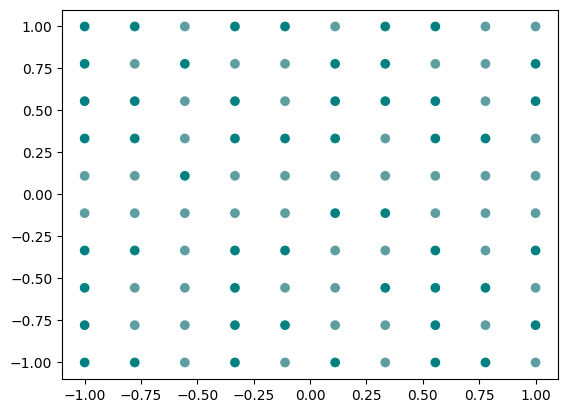

In [197]:
RES=10
X=[]
for x_1 in np.linspace(-1,1,RES):
    for x_2 in np.linspace(-1,1,RES):
        X.append([x_1,x_2])
X=np.array(X)

encode_inputs=lambda x: 1 if np.random.random()<0.5 else 0
Y=np.array([encode_inputs(x) for x in X])

X_0=np.array([x for k,x in enumerate(X) if Y[k]==0])
X_1=np.array([x for k,x in enumerate(X) if Y[k]==1])
X=np.concatenate((X_0,X_1))
Y=np.concatenate((np.zeros(len(X_0)),np.ones(len(X_1))))

X=torch.from_numpy(X).float()
Y=torch.from_numpy(Y).float()


colors=np.full(len(Y), 'cadetblue')
colors[Y==0]='teal'

plt.scatter(X[:,0],X[:,1],c=colors)

In [198]:
model = NeuralNet(2,256,2)
ReLU_glorot_init(model)

def next_batch(inputs, targets, batchSize):
	for i in range(0, inputs.shape[0], batchSize):
		yield (inputs[i:i + batchSize], targets[i:i + batchSize])

BATCH_SIZE = 100
EPOCHS = 200
LR = 0.05

opt = SGD(model.parameters(), lr=LR)
lossFunc = nn.CrossEntropyLoss()

Epoch 1: Loss 0.694
Epoch 2: Loss 0.694
Epoch 3: Loss 0.694
Epoch 4: Loss 0.693
Epoch 5: Loss 0.693


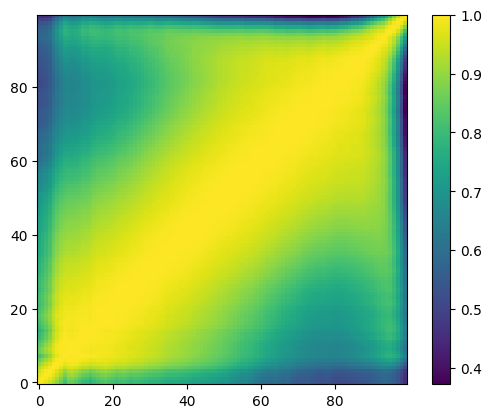

In [199]:
for n in range(5):
    l=training()
    print('Epoch {}: Loss {:.3f}'.format(n+1,l))

grads=[]
for x,y in next_batch(X,Y,1):
    predictions = model(x)
    loss = lossFunc(predictions, y.long())
    loss.backward()
    gradient=[]
    gradient+=torch.flatten(model.input_layer.weight.grad).tolist()
    gradient+=model.input_layer.bias.grad.tolist()
    gradient+=torch.flatten(model.hidden.weight.grad).tolist()
    gradient+=model.hidden.bias.grad.tolist()
    gradient+=torch.flatten(model.output_layer.weight.grad).tolist()
    gradient+=model.output_layer.bias.grad.tolist()
    gradient=np.array(gradient)
    gradient=gradient/np.linalg.norm(gradient)
    grads.append(gradient)
dot_matrix=[]
for grad1 in grads:
    row=[]
    for grad2 in grads:
        row.append(dot(grad1,grad2))
    dot_matrix.append(np.array(row))
dot_matrix=np.array(dot_matrix)

fig, axs = plt.subplots(1,1)

pcm=axs.imshow(dot_matrix,origin='lower')

fig.colorbar(pcm, ax=axs)

Epoch 1: Loss 0.692
Epoch 2: Loss 0.692
Epoch 3: Loss 0.692
Epoch 4: Loss 0.691
Epoch 5: Loss 0.691


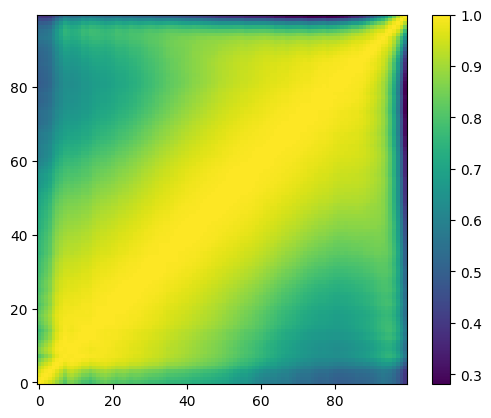

In [200]:
for n in range(5):
    l=training()
    print('Epoch {}: Loss {:.3f}'.format(n+1,l))

grads=[]
for x,y in next_batch(X,Y,1):
    predictions = model(x)
    loss = lossFunc(predictions, y.long())
    loss.backward()
    gradient=[]
    gradient+=torch.flatten(model.input_layer.weight.grad).tolist()
    gradient+=model.input_layer.bias.grad.tolist()
    gradient+=torch.flatten(model.hidden.weight.grad).tolist()
    gradient+=model.hidden.bias.grad.tolist()
    gradient+=torch.flatten(model.output_layer.weight.grad).tolist()
    gradient+=model.output_layer.bias.grad.tolist()
    gradient=np.array(gradient)
    gradient=gradient/np.linalg.norm(gradient)
    grads.append(gradient)
dot_matrix=[]
for grad1 in grads:
    row=[]
    for grad2 in grads:
        row.append(dot(grad1,grad2))
    dot_matrix.append(np.array(row))
dot_matrix=np.array(dot_matrix)

fig, axs = plt.subplots(1,1)

pcm=axs.imshow(dot_matrix,origin='lower')

fig.colorbar(pcm, ax=axs)

Epoch 1: Loss 0.691
Epoch 2: Loss 0.691
Epoch 3: Loss 0.690
Epoch 4: Loss 0.690
Epoch 5: Loss 0.690


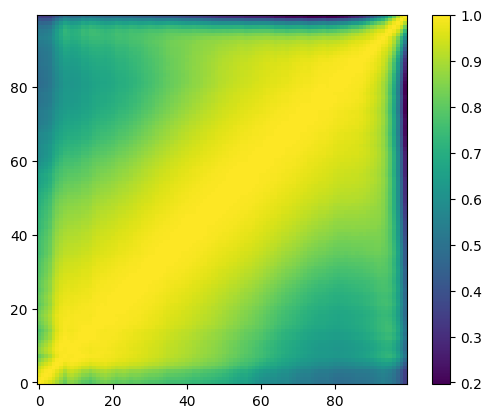

In [201]:
for n in range(5):
    l=training()
    print('Epoch {}: Loss {:.3f}'.format(n+1,l))

grads=[]
for x,y in next_batch(X,Y,1):
    predictions = model(x)
    loss = lossFunc(predictions, y.long())
    loss.backward()
    gradient=[]
    gradient+=torch.flatten(model.input_layer.weight.grad).tolist()
    gradient+=model.input_layer.bias.grad.tolist()
    gradient+=torch.flatten(model.hidden.weight.grad).tolist()
    gradient+=model.hidden.bias.grad.tolist()
    gradient+=torch.flatten(model.output_layer.weight.grad).tolist()
    gradient+=model.output_layer.bias.grad.tolist()
    gradient=np.array(gradient)
    gradient=gradient/np.linalg.norm(gradient)
    grads.append(gradient)
dot_matrix=[]
for grad1 in grads:
    row=[]
    for grad2 in grads:
        row.append(dot(grad1,grad2))
    dot_matrix.append(np.array(row))
dot_matrix=np.array(dot_matrix)

fig, axs = plt.subplots(1,1)

pcm=axs.imshow(dot_matrix,origin='lower')

fig.colorbar(pcm, ax=axs)

Epoch 1: Loss 0.690
Epoch 2: Loss 0.689
Epoch 3: Loss 0.689
Epoch 4: Loss 0.689
Epoch 5: Loss 0.689
Epoch 6: Loss 0.688
Epoch 7: Loss 0.688
Epoch 8: Loss 0.688
Epoch 9: Loss 0.688
Epoch 10: Loss 0.688
Epoch 11: Loss 0.688
Epoch 12: Loss 0.687
Epoch 13: Loss 0.687
Epoch 14: Loss 0.687
Epoch 15: Loss 0.687
Epoch 16: Loss 0.687
Epoch 17: Loss 0.686
Epoch 18: Loss 0.686
Epoch 19: Loss 0.686
Epoch 20: Loss 0.686
Epoch 21: Loss 0.686
Epoch 22: Loss 0.686
Epoch 23: Loss 0.685
Epoch 24: Loss 0.685
Epoch 25: Loss 0.685
Epoch 26: Loss 0.685
Epoch 27: Loss 0.685
Epoch 28: Loss 0.685
Epoch 29: Loss 0.685
Epoch 30: Loss 0.684
Epoch 31: Loss 0.684
Epoch 32: Loss 0.684
Epoch 33: Loss 0.684
Epoch 34: Loss 0.684
Epoch 35: Loss 0.684
Epoch 36: Loss 0.684
Epoch 37: Loss 0.683
Epoch 38: Loss 0.683
Epoch 39: Loss 0.683
Epoch 40: Loss 0.683
Epoch 41: Loss 0.683
Epoch 42: Loss 0.683
Epoch 43: Loss 0.683
Epoch 44: Loss 0.683
Epoch 45: Loss 0.682
Epoch 46: Loss 0.682
Epoch 47: Loss 0.682
Epoch 48: Loss 0.682
E

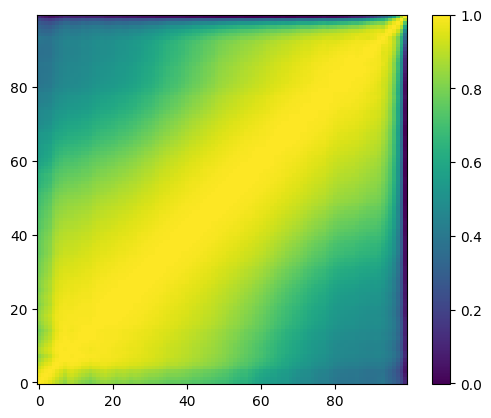

In [202]:
for n in range(200):
    l=training()
    print('Epoch {}: Loss {:.3f}'.format(n+1,l))

grads=[]
for x,y in next_batch(X,Y,1):
    predictions = model(x)
    loss = lossFunc(predictions, y.long())
    loss.backward()
    gradient=[]
    gradient+=torch.flatten(model.input_layer.weight.grad).tolist()
    gradient+=model.input_layer.bias.grad.tolist()
    gradient+=torch.flatten(model.hidden.weight.grad).tolist()
    gradient+=model.hidden.bias.grad.tolist()
    gradient+=torch.flatten(model.output_layer.weight.grad).tolist()
    gradient+=model.output_layer.bias.grad.tolist()
    gradient=np.array(gradient)
    gradient=gradient/np.linalg.norm(gradient)
    grads.append(gradient)
dot_matrix=[]
for grad1 in grads:
    row=[]
    for grad2 in grads:
        row.append(dot(grad1,grad2))
    dot_matrix.append(np.array(row))
dot_matrix=np.array(dot_matrix)

fig, axs = plt.subplots(1,1)

pcm=axs.imshow(dot_matrix,origin='lower')

fig.colorbar(pcm, ax=axs)